<a href="https://colab.research.google.com/github/mrvzay/regression-problem/blob/main/regressoion_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression problem with TensorFlow
In a *regression* problem, the aim is to predict the output of a continuous value, like a price or a probability.

In [1]:
# Import TensorlFlow
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Medicat cost dataset
The dataset publically available [Modical cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) available from **Kaggle** and [hosted on Github](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv).

### Get the data
First dowload and import the dataset using pandas:

In [3]:
# Read in the insurance dataset
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
# Check out the insurace dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


You have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

So use `get_dummies()` method in pandas.

it converts categoircal variables (like sex, smoker and region columns) into numerical variables using one-hot encoding.

In [5]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance_df)

In [6]:
# View the converted columns and data how's looklike ?
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Ok now we'll split data into features (X) and labels (y).

In [7]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1) # Noticed that X is capitalized
y = insurance_one_hot["charges"]

In [8]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


And create training and test sets. We could do this manually, but to make it easier, we'll leaverge the already available `train_test_split` function available from scikit-Learn.

In [9]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20 % test data
                                                    random_state=42 )# Set the random sate for reproducible splits
                                                                   # random state number totally up to you!
                                                   

### Model : insurance_model


In [10]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [11]:
# Set ranndom set_seed
tf.random.set_seed(42)

# Create a model
insurance_model = tf.keras.Sequential([
  layers.Dense(100), # 100 units
  layers.Dense(10), # 10 units
  layers.Dense(1) # 1 unit ( important for out layers)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, # Mean absulote error
                        optimizer=tf.keras.optimizers.Adam(), # default learning rate lr=0.001
                        metrics=["mae"] # allso use mse
                        )
# Fit the model and save the insurance_history model we can plot this.
insurance_history = insurance_model.fit(X_train, y_train,
                                        epochs=100,
                                        verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [12]:
# insurance_model summary()
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Evaluate model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

muchh better!

Text(0, 0.5, 'epochs')

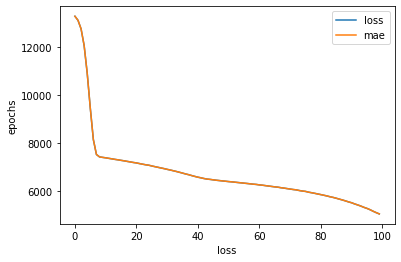

In [14]:
# Plot insurance_history also known a loss curves
pd.DataFrame(insurance_history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

## Preprocessing data (normalization and standardization

insurance_model see get_dummies().

now lets's try sklearn classes.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# Check out the data
insurance.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Few classes Scikit-Learn:
* `MinMaxScaler` - make sure all numerical columns are normalized (between 0 and 1).
* `OneHotEncoder` - one hot encoder the non-numerical columns

Let's see....!

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer (this is help as normalize/prepracess our model)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 & 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y 
X = insurance_df.drop("charges", axis=1)
y = insurance_df["charges"]

# set the train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Transform training data and test data with normalizaiton
X_train_normal = ct.fit_transform(X_train) # Fit only training data (doing so on test data would results in the data leakage)
X_test_normal = ct.transform(X_test)

Normalized data, how is looke like data ?

In [17]:
# Non-normalized and non-one-hot encoded data example 
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [18]:
# Normalized and one-hot encoder example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Check the shapes.

In [19]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [20]:
# set random set seed
tf.random.set_seed(42)

# Build the model same as above 
insurance_model_3 = tf.keras.Sequential([
  layers.Dense(100),
  layers.Dense(10),
  layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# Fit the model
insurance_history_3 = insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [21]:
# Evaluate the model
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5771 - mae: 3171.5771


[3171.5771484375, 3171.5771484375]

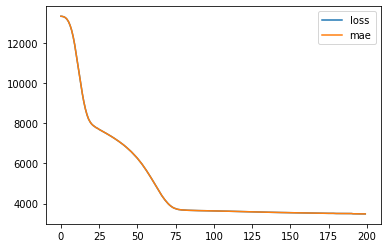

In [22]:
# Plot loss curves
pd.DataFrame(insurance_history_3.history).plot();

You can see normalizing the data results in 10% less error using the same model than not normalizing the data.

Yeah that's it.